In [159]:
import pandas as pd
import numpy as np

In [160]:
data=pd.DataFrame({'Weight':[45,65,53,49,45],'Height':[140,165,146,150,142],'Age':[15,17,16,17,18]})

In [161]:
data

,Weight,Height,Age
0,45,140,15
1,65,165,17
2,53,146,16
3,49,150,17
4,45,142,18


In [162]:
# Estimation - find b0, b1
# OLS and Gradient 
# b1 =  sum((x-xbar)*(y-ybar))/ sum((x-xbar)^2)
#b0 = ybar - b1*xbar

In [163]:
num= np.sum((data['Weight'] - data['Weight'].mean()) * (data['Height'] - data['Height'].mean()))

In [164]:
den=np.sum((data['Weight']-data['Weight'].mean())**2)

In [165]:
b1=num/den
b1

1.1366279069767442

In [166]:
b0 = data['Height'].mean()-b1*data['Weight'].mean() # ybar-b1*xbar
b0

90.17732558139534

In [167]:
# Height(cms) = 1.13 *Weight(kg) + 90.17

In [168]:
ypred=b1*data['Weight']+b0

In [169]:
ypred

0    141.325581
1    164.058140
2    150.418605
3    145.872093
4    141.325581
Name: Weight, dtype: float64

In [170]:

data['Height']

0    140
1    165
2    146
3    150
4    142
Name: Height, dtype: int64

In [171]:
resid=data['Height']-ypred
resid

0   -1.325581
1    0.941860
2   -4.418605
3    4.127907
4    0.674419
dtype: float64

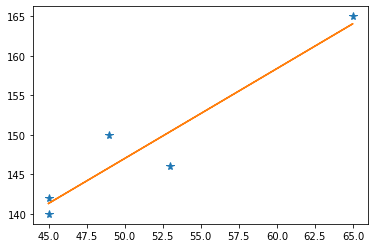

In [172]:
from matplotlib import pyplot as plt
plt.plot(data['Weight'],data['Height'],'*', markersize=8)
plt.plot(data['Weight'],b1*data['Weight']+b0)

In [173]:
resid

0   -1.325581
1    0.941860
2   -4.418605
3    4.127907
4    0.674419
dtype: float64

In [175]:
se=resid**2
sse=np.sum(se)
mse=np.mean(se)
rmse=np.sqrt(mse)


In [176]:
#print(se)
print(sse)
print(mse)
print(rmse)

39.662790697674566
7.932558139534914
2.8164797424329033


In [177]:
# ypred=b1*weight +b2*age + b0

In [178]:
# Var(mean) - var(line) / var(mean)

In [179]:
mean_model= np.var(data['Height']-data['Height'].mean())

In [180]:
reg_model=np.var(data['Height'] - (b1*data['Weight']+b0))

In [181]:
r2=(mean_model-reg_model)/mean_model
r2

0.8996386875058843

In [182]:
data.corr()

,Weight,Height,Age
Weight,1.000000,0.948493,0.126886
Height,0.948493,1.000000,0.291182
Age,0.126886,0.291182,1.000000


In [183]:
R=0.948493
R**2

0.899638971049

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
mod=LinearRegression()
mod.fit(data['Weight'].values.reshape(-1,1),data['Height'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
ypred1=mod.predict(data['Weight'].values.reshape(-1,1))
ypred1

array([141.3255814 , 164.05813953, 150.41860465, 145.87209302,
       141.3255814 ])

In [187]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(data['Height'],ypred1)

0.899638687505884

In [188]:
np.sqrt(mean_squared_error(data['Height'],ypred1))

2.816479742432905

In [189]:
mod.coef_

array([1.13662791])

In [190]:
mod.intercept_

90.17732558139537

In [1]:
import pandas as pd
data_ref=pd.read_excel('Refrigerators.xlsx')

In [192]:
data_ref.head()

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
0,595,75,7.1,5.7,3,2
1,685,75,7.2,5.7,3,1
2,535,67,8.8,4.5,1,6
3,600,67,8.7,4.5,3,5
4,605,67,8.8,4.5,3,3


In [193]:
# Model -  Predicting price of refrigerator using all other inputs

In [3]:
import statsmodels.api as sm

In [2]:
inp=data_ref.iloc[:,1:]
out=data_ref['Price']

In [5]:
inp_c=sm.add_constant(inp)
ols1=sm.OLS(out,inp_c)
mod1=ols1.fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     32.05
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.27e-11
Time:                        11:33:32   Log-Likelihood:                -201.12
No. Observations:                  37   AIC:                             414.2
Df Residuals:                      31   BIC:                             423.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -797.8082    271.409     -2.940      0.006   -1351.351    -244.265
Opcost        -6.9578      2.275     -3.058      0.005     -11.598      -2.317
CoolSize      76.4971     19.442      3.935      0.000      36.846     116.148
FreezeSize   213.8785     35.761      5.981      0.000     140.943     286.814
Shelves       37.9373      9.886      3.837      0.001      17.774      58.100
Features      23.7636      4.512      5.267      0.000      14.562      32.965
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                1.005
Skew:                           0.289   Prob(JB):                        0.605
Kurtosis:                       2.435   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
 #Estimated value of beta- true value of beta  / standard error

In [198]:
# Linearity
#y=2*x
#ypred=b0+b1x1+b2x2+b3x3+ ......
ypred = mod1.predict(inp_c)

In [199]:
from matplotlib import pyplot as plt
import seaborn as sb

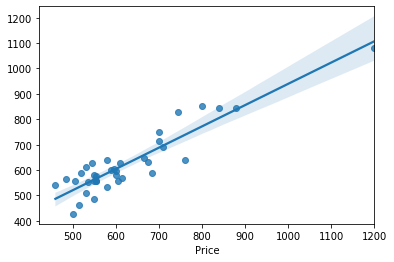

In [200]:
sb.regplot(out,ypred)

In [201]:
from statsmodels.stats.diagnostic import linear_rainbow

In [202]:
linear_rainbow(res=mod1,frac=0.5)

(1.229003687336261, 0.36464475875614083)

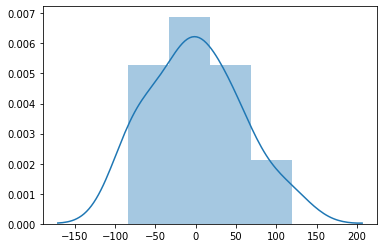

In [203]:
# Normality
sb.distplot(mod1.resid)

In [204]:
import scipy.stats as stats
stats.shapiro(mod1.resid)

(0.9613720774650574, 0.22325065732002258)

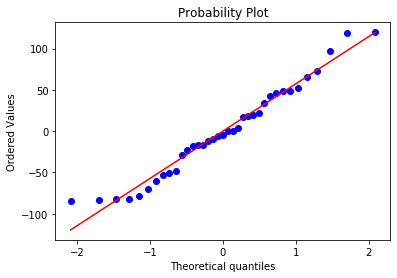

In [205]:
stats.probplot(mod1.resid,fit='norm',plot=plt)
plt.show()

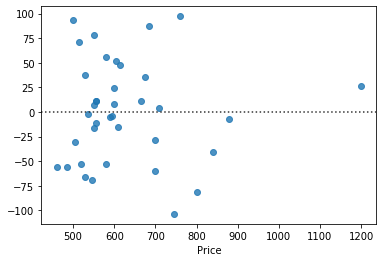

In [206]:
# Homoscadesticity
sb.residplot(out,mod1.resid)

In [207]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(mod1.resid,mod1.model.exog)[:2]

(1.9918809170245613, 0.11609967581061173)

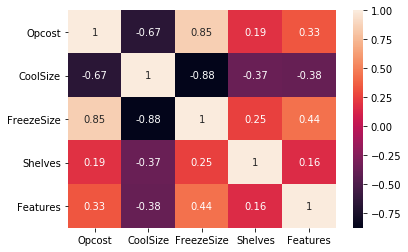

In [208]:
# Multicollinearity
sb.heatmap(inp.corr(),annot=True)

In [209]:
# f1 - (f2,f3,f4,f5) ---- Rsquare =1   ---- vif= 1/(1-Rsqaure) --- vif = inf
                          # Rsquare =0  ----- vif = 1/(1-Rsquare) --- vif =1
    
    #f1 - vif= 17   p = 0.005
    #f2 - vif= 14   p = 0.02

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['Feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
0,259.407845,Opcost
2,179.916043,FreezeSize
1,24.261754,CoolSize
3,6.478725,Shelves
4,3.680741,Features


In [211]:
inp1=inp.drop('Opcost',1)

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif['Feature']=inp1.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
1,19.534441,FreezeSize
0,11.050641,CoolSize
2,6.474278,Shelves
3,3.649582,Features


In [213]:
inp_c=sm.add_constant(inp1)
ols2=sm.OLS(out,inp_c)
mod2=ols2.fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 22 May 2020   Prob (F-statistic):           2.10e-10
Time:                        16:42:16   Log-Likelihood:                -205.99
No. Observations:                  37   AIC:                             422.0
Df Residuals:                      32   BIC:                             430.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -698.8915    302.602     -2.310      0.028   -1315.272     -82.511
CoolSize      56.4978     20.559      2.748      0.010      14.620      98.375
FreezeSize   131.8951     26.576      4.963      0.000      77.761     186.029
Shelves       35.9230     11.077      3.243      0.003      13.360      58.486
Features      25.1590      5.040      4.992      0.000      14.892      35.426
==============================================================================
Omnibus:                        1.106   Durbin-Watson:                   2.556
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.595
Skew:                           0.307   Prob(JB):                        0.743
Kurtosis:                       3.090   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
inp2=inp1.drop('FreezeSize',1)

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif['Feature']=inp2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
1,5.148103,Shelves
0,4.951003,CoolSize
2,2.785663,Features


In [216]:
inp_c=sm.add_constant(inp2)
ols3=sm.OLS(out,inp_c)
mod3=ols3.fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     18.46
Date:                Fri, 22 May 2020   Prob (F-statistic):           3.29e-07
Time:                        16:42:17   Log-Likelihood:                -216.55
No. Observations:                  37   AIC:                             441.1
Df Residuals:                      33   BIC:                             447.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        705.8607    140.176      5.036      0.000     420.670     991.052
CoolSize     -30.8041     13.940     -2.210      0.034     -59.166      -2.443
Shelves       26.1497     14.279      1.831      0.076      -2.902      55.201
Features      31.1773      6.409      4.865      0.000      18.138      44.216
==============================================================================
Omnibus:                        3.637   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.080
Skew:                           0.705   Prob(JB):                        0.214
Kurtosis:                       2.896   Cond. No.                         90.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
inp.head()

,Opcost,CoolSize,FreezeSize,Shelves,Features
0,75,7.1,5.7,3,2
1,75,7.2,5.7,3,1
2,67,8.8,4.5,1,6
3,67,8.7,4.5,3,5
4,67,8.8,4.5,3,3


In [4]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)
inp_pf=pf.fit_transform(inp)
inp_pf=pd.DataFrame(inp_pf)
inp_pf.columns=pf.get_feature_names()
inp_pf.head()

,x0,x1,x2,x3,x4,x0 x1,x0 x2,x0 x3,x0 x4,x1 x2,x1 x3,x1 x4,x2 x3,x2 x4,x3 x4
0,75.0,7.1,5.7,3.0,2.0,532.5,427.5,225.0,150.0,40.47,21.3,14.2,17.1,11.4,6.0
1,75.0,7.2,5.7,3.0,1.0,540.0,427.5,225.0,75.0,41.04,21.6,7.2,17.1,5.7,3.0
2,67.0,8.8,4.5,1.0,6.0,589.6,301.5,67.0,402.0,39.60,8.8,52.8,4.5,27.0,6.0
3,67.0,8.7,4.5,3.0,5.0,582.9,301.5,201.0,335.0,39.15,26.1,43.5,13.5,22.5,15.0
4,67.0,8.8,4.5,3.0,3.0,589.6,301.5,201.0,201.0,39.60,26.4,26.4,13.5,13.5,9.0


In [218]:
inp_c=sm.add_constant(inp_pf)
ols_pf=sm.OLS(out,inp_c)
mod_pf=ols_pf.fit()
mod_pf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     19.59
Date:                Fri, 22 May 2020   Prob (F-statistic):           4.79e-09
Time:                        16:42:18   Log-Likelihood:                -184.69
No. Observations:                  37   AIC:                             401.4
Df Residuals:                      21   BIC:                             427.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        910.9404   4647.410      0.196      0.846   -8753.878    1.06e+04
x0           -76.8323     83.476     -0.920      0.368    -250.430      96.766
x1           146.7113    318.373      0.461      0.650    -515.381     808.803
x2           672.5773    782.532      0.859      0.400    -954.787    2299.941
x3            -8.3552    502.623     -0.017      0.987   -1053.617    1036.906
x4           193.4598    341.114      0.567      0.577    -515.925     902.845
x0 x1          4.9653      6.902      0.719      0.480      -9.389      19.319
x0 x2          4.6591      5.725      0.814      0.425      -7.246      16.564
x0 x3          0.7662      2.475      0.310      0.760      -4.381       5.913
x0 x4          0.0734      2.724      0.027      0.979      -5.591       5.738
x1 x2       -102.9255     66.987     -1.536      0.139    -242.234      36.383
x1 x3         13.5643     29.358      0.462      0.649     -47.490      74.618
x1 x4        -12.3952     20.092     -0.617      0.544     -54.179      29.389
x2 x3        -21.2813     59.410     -0.358      0.724    -144.831     102.269
x2 x4        -13.1377     42.041     -0.313      0.758    -100.566      74.290
x3 x4         -6.6587      8.139     -0.818      0.422     -23.585      10.267
==============================================================================
Omnibus:                        3.240   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.129
Skew:                           0.295   Prob(JB):                        0.345
Kurtosis:                       4.016   Cond. No.                     4.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
while(len(inp_pf.columns)>0):
    inp_c=sm.add_constant(inp_pf)
    ols_pf=sm.OLS(out,inp_c)
    mod_pf=ols_pf.fit()
    f=mod_pf.pvalues[1:].idxmax()
    if mod_pf.pvalues[1:].max()>0.05:
        inp_pf=inp_pf.drop(f,1)
    else:
        break
print('The final features trough backward eliminations are :',inp_pf.columns)


The final features trough backward eliminations are : Index(['x0', 'x1', 'x2', 'x4', 'x1 x2', 'x1 x3', 'x2 x3'], dtype='object')


In [ ]:
Age, salary, Exp ---- Pc1, pc2, pc3

In [220]:
mod_pf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     46.58
Date:                Fri, 22 May 2020   Prob (F-statistic):           4.41e-14
Time:                        16:42:19   Log-Likelihood:                -188.44
No. Observations:                  37   AIC:                             392.9
Df Residuals:                      29   BIC:                             405.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2763.2794    456.887     -6.048      0.000   -3697.719   -1828.840
x0            -6.5530      1.739     -3.768      0.001     -10.110      -2.996
x1           382.2552     65.358      5.849      0.000     248.582     515.928
x2           860.5576    128.594      6.692      0.000     597.554    1123.561
x4            17.6792      4.186      4.223      0.000       9.117      26.241
x1 x2        -91.6221     17.610     -5.203      0.000    -127.639     -55.605
x1 x3         17.4854      3.503      4.992      0.000      10.322      24.649
x2 x3        -26.4568      6.111     -4.329      0.000     -38.956     -13.958
==============================================================================
Omnibus:                        1.171   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.356
Skew:                           0.033   Prob(JB):                        0.837
Kurtosis:                       3.476   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)
inp_pf=pf.fit_transform(inp)
inp_pf=pd.DataFrame(inp_pf)
inp_pf.columns=pf.get_feature_names()
inp_pf.head()

,x0,x1,x2,x3,x4,x0 x1,x0 x2,x0 x3,x0 x4,x1 x2,x1 x3,x1 x4,x2 x3,x2 x4,x3 x4
0,75.0,7.1,5.7,3.0,2.0,532.5,427.5,225.0,150.0,40.47,21.3,14.2,17.1,11.4,6.0
1,75.0,7.2,5.7,3.0,1.0,540.0,427.5,225.0,75.0,41.04,21.6,7.2,17.1,5.7,3.0
2,67.0,8.8,4.5,1.0,6.0,589.6,301.5,67.0,402.0,39.60,8.8,52.8,4.5,27.0,6.0
3,67.0,8.7,4.5,3.0,5.0,582.9,301.5,201.0,335.0,39.15,26.1,43.5,13.5,22.5,15.0
4,67.0,8.8,4.5,3.0,3.0,589.6,301.5,201.0,201.0,39.60,26.4,26.4,13.5,13.5,9.0


In [222]:
# forward feature selection using adjusted Rsquare

inp=pd.DataFrame(inp_pf.iloc[:,0])
inp_c=sm.add_constant(inp)
ols=sm.OLS(out,inp_c)
mod=ols.fit()
r_adj=mod.rsquared_adj
for i in inp_pf.columns[1:]:
    inp[i]=inp_pf[i]
    inp_c=sm.add_constant(inp)
    ols=sm.OLS(out,inp_c)
    mod=ols.fit()
    if mod.rsquared_adj<=r_adj: 
        inp=inp.drop(i,1)
    else:
        r_adj=mod.rsquared_adj
        print(r_adj)
        print(inp.columns)
print(inp.columns)

0.3166634039425932
Index(['x0', 'x1'], dtype='object')
0.5634653417946316
Index(['x0', 'x1', 'x2'], dtype='object')
0.6544399940891866
Index(['x0', 'x1', 'x2', 'x3'], dtype='object')
0.8117564194611091
Index(['x0', 'x1', 'x2', 'x3', 'x4'], dtype='object')
0.8193869073263456
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1'], dtype='object')
0.8290735975959335
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1', 'x0 x4'], dtype='object')
0.854413106883594
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1', 'x0 x4', 'x1 x2'], dtype='object')
0.89374192509741
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1', 'x0 x4', 'x1 x2', 'x1 x3'], dtype='object')
0.8943637449720767
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1', 'x0 x4', 'x1 x2', 'x1 x3',
       'x2 x3'],
      dtype='object')
0.8997442042155644
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1', 'x0 x4', 'x1 x2', 'x1 x3',
       'x2 x3', 'x3 x4'],
      dtype='object')
Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x0 x1', 'x0 x4', 'x1 x2', 'x1 x3',
       'x2 x3', 'x3 x

In [223]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
rfe=RFE(lr,6)
rfe.fit(inp_pf,out)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=6, step=1, verbose=0)

In [224]:
Rank=pd.DataFrame()
Rank['RANK']=rfe.ranking_
Rank['Feature']=inp_pf.columns
Rank.sort_values('RANK')

,RANK,Feature
1,1,x1
2,1,x2
3,1,x3
4,1,x4
9,1,x1 x2
12,1,x2 x3
11,2,x1 x4
14,3,x3 x4
0,4,x0
13,5,x2 x4


In [247]:
inp.columns

Index(['Region', 'Parcels', 'TruckAge'], dtype='object')

In [248]:
data_ref=pd.read_excel('Refrigerators.xlsx')
out=data_ref['Price']
inp=data_ref.drop('Price',1)

In [249]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)
inp_pf=pf.fit_transform(inp)
inp_pf=pd.DataFrame(inp_pf)
inp_pf.columns=pf.get_feature_names()
inp_pf.head()

,x0,x1,x2,x3,x4,x0 x1,x0 x2,x0 x3,x0 x4,x1 x2,x1 x3,x1 x4,x2 x3,x2 x4,x3 x4
0,75.0,7.1,5.7,3.0,2.0,532.5,427.5,225.0,150.0,40.47,21.3,14.2,17.1,11.4,6.0
1,75.0,7.2,5.7,3.0,1.0,540.0,427.5,225.0,75.0,41.04,21.6,7.2,17.1,5.7,3.0
2,67.0,8.8,4.5,1.0,6.0,589.6,301.5,67.0,402.0,39.60,8.8,52.8,4.5,27.0,6.0
3,67.0,8.7,4.5,3.0,5.0,582.9,301.5,201.0,335.0,39.15,26.1,43.5,13.5,22.5,15.0
4,67.0,8.8,4.5,3.0,3.0,589.6,301.5,201.0,201.0,39.60,26.4,26.4,13.5,13.5,9.0


In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
mod_lr=LinearRegression()
res=cross_val_score(mod_lr,inp_pf,out,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(res))
print(rmse.mean())
print(rmse.std())
res

549.6120843578111
600.4486538816402


array([  -34315.18787388,    -4561.84418447, -1948959.05560288])

In [251]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
mod_rid=Ridge(alpha=0.5,normalize=True)
res=cross_val_score(mod_rid,inp_pf,out,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(res))
print(rmse.mean())
print(rmse.std())
res

83.51014241129319
26.82433985880426


array([ -4137.30709989,  -4194.36218863, -14748.79799472])

In [229]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
mod_las=Lasso(alpha=0.5,normalize=True)
res=cross_val_score(mod_las,inp_pf,out,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(res))
print(rmse.mean())
print(rmse.std())
res

89.61752227160822
38.86483817406868


array([ -3639.42795227,  -4094.04978184, -20891.85009909])

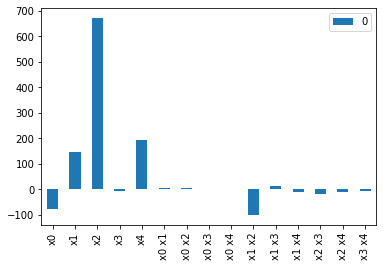

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
mod_lr=LinearRegression()
mod_lr.fit(inp_pf,out)
#res=cross_val_score(mod_las,inp,out,cv=3,scoring='neg_mean_squared_error')
coef=pd.DataFrame(mod_lr.coef_)
coef.index=inp_pf.columns
coef.plot(kind='bar')


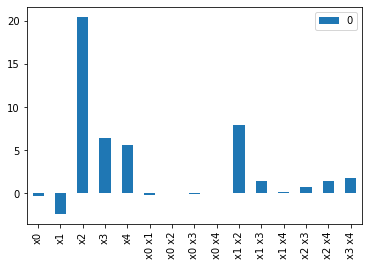

In [271]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
mod_rid=Ridge(alpha=0.5,normalize=True)
mod_rid.fit(inp_pf,out)
#res=cross_val_score(mod_las,inp,out,cv=3,scoring='neg_mean_squared_error')
mod_rid.coef_
coef=pd.DataFrame(mod_rid.coef_)
coef.index=inp_pf.columns
coef.plot(kind='bar')

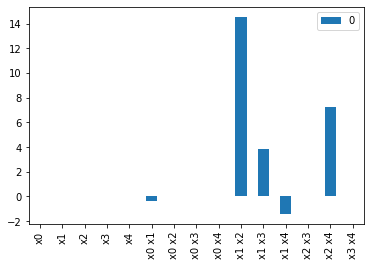

In [272]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
mod_las=Lasso(alpha=0.5,normalize=True)
mod_las.fit(inp_pf,out)
#res=cross_val_score(mod_las,inp,out,cv=3,scoring='neg_mean_squared_error')
mod_las.coef_
coef=pd.DataFrame(mod_las.coef_)
coef.index=inp_pf.columns
coef.plot(kind='bar')

In [260]:
from sklearn.linear_model import RidgeCV
rid_cv = RidgeCV(alphas=[0.1, 1.0, 10.0],normalize=True)
rid_cv.fit(inp_pf, out)
rid_cv.alpha_

0.1

In [7]:
import pandas as pd
data=pd.read_excel('delivery.xlsx')

data.head()

,Trip,Region,Parcels,TruckAge,Minutes
0,1,B,46,11,461.9
1,2,B,32,1,273.1
2,3,C,42,14,489.4
3,4,B,30,13,303.0
4,5,B,36,15,367.7


In [8]:
data['Region'].value_counts()

C    17
B    16
A    14
Name: Region, dtype: int64

In [235]:
data=data.drop('Trip',1)

In [236]:
data.columns

Index(['Region', 'Parcels', 'TruckAge', 'Minutes'], dtype='object')

In [237]:
out=data['Minutes']
inp=data.drop('Minutes',1)

In [238]:
inp_dum=pd.get_dummies(inp,drop_first=True)
inp_dum.head(2)

,Parcels,TruckAge,Region_B,Region_C
0,46,11,1,0
1,32,1,1,0


In [239]:
inp_c=sm.add_constant(inp_dum)
ols=sm.OLS(out,inp_c)
mod=ols.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     205.2
Date:                Fri, 22 May 2020   Prob (F-statistic):           5.68e-27
Time:                        16:42:38   Log-Likelihood:                -209.96
No. Observations:                  47   AIC:                             429.9
Df Residuals:                      42   BIC:                             439.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9558     17.852      4.087      0.000      36.929     108.982
Parcels        9.9249      0.402     24.716      0.000       9.115      10.735
TruckAge       3.6838      0.759      4.851      0.000       2.151       5.216
Region_B    -106.4985      8.173    -13.031      0.000    -122.991     -90.006
Region_C    -107.7127      8.079    -13.333      0.000    -124.017     -91.409
==============================================================================
Omnibus:                       44.045   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.117
Skew:                           2.420   Prob(JB):                     1.15e-37
Kurtosis:                      10.965   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""